In [2]:
!pip install -q sociophysicsDataHandler 
from sociophysicsDataHandler import SociophysicsDataHandler
dh = SociophysicsDataHandler()
p = """guest
YDPGL-XREXC-QGMZS-UAKES"""
c = """text_file = open("auth.txt", "w+");text_file.write(p);text_file.close()""" 
exec(c)

In [3]:
import numpy as np
import pandas as pd
from datetime import datetime
import math as math
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns;
from scipy.signal import fftconvolve
from ipywidgets import IntProgress
from IPython.display import display

try:
    from PIL import Image
except ImportError:
    import Image

In [4]:
def fetch_ehv(date: int, hour = -1):
    """If hour is given, fetches the data for that hour of that date; else, it creates a dataframe of the list of dates.
    An example format for the date is 20220115. An empty dataframe is returned in case of missing data.
    """
    assert -1 <= hour < 24
      
    file_path = 'ehv/platform2.1/' + str(date)
    file_list = dh.list_files(file_path)
    
    if hour == -1:
        return file_list
    else:
        try:
            dh.fetch_prorail_data_from_path(file_path + '/' + file_list.name.iloc[hour])
            df = dh.df.copy()
            return df
        except:
            print(file_path + f', hour {hour} is missing.')
            df = pd.DataFrame(columns = ('date_time_utc', 'tracked_object', 'x_pos','y_pos'))
        return df

In [5]:
# defining overarching dataframe
df_collect = pd.DataFrame(columns=['N','p_left','p_right'])

f = IntProgress(min=0, max=1000) # instantiate the bar
display(f)

for j in range(20220201, 20220215):
    for i in range(10):
        # fetching the dataframe
        try:
            df = fetch_ehv(j, i);
        except:
            print(f'Could not load frame {i}, {j}')

        if len(df) > 0:

            # binning the data
            df['left_bin'] = df['y_pos'] < 40000
            df['right_bin'] = df['y_pos'] >= 40000

            df_bins = df.drop(['tracked_object', 'x_pos', 'y_pos'], axis=1).groupby('date_time_utc').sum()

            df_bins['N'] = df_bins['left_bin'] + df_bins['right_bin']
            df_bins['p_left'] = df_bins['left_bin']/df_bins['N']
            df_bins['p_right'] = df_bins['right_bin']/df_bins['N']

            df_bins.drop(['left_bin', 'right_bin'], axis=1, inplace=True)

            # filtering the data on trains
            sigma = 500

            l = len(df_bins['N'])

            gauss_k = np.array([np.exp(-(i-l/2)**2/(2*sigma**2)) for i in range(l)]) * (1/(sigma * np.sqrt(2*np.pi)))

            gauss_der = np.convolve(gauss_k, np.array([1, 0, -1]))

            der = fftconvolve(df_bins['N'].to_numpy(), gauss_der)[int(np.floor(l/2)):int(l+np.floor(l/2))]

            cond = np.logical_and(der > 0, der < 0.03)

            df_filtered = df_bins[cond]

            # sampling the data
            df_sample = df_filtered.iloc[list(range(0, len(df_filtered), 1000)), :]

            # add to existing dataframe
            df_collect = df_collect.append(df_sample)
            f.value += 1

df_collect

IntProgress(value=0, max=1000)

targeting path /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20220201
Files listed. Accessible as <this-object>.filelist
trying to fetch: /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20220201/EHV_Platform2.1_2022020100_trajectorie.parquet
data fetched. Accessible as <this-object>.df
targeting path /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20220201
Files listed. Accessible as <this-object>.filelist
trying to fetch: /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20220201/EHV_Platform2.1_2022020101_trajectorie.parquet
data fetched. Accessible as <this-object>.df
targeting path /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20220201
Files listed. Accessible as <this-object>.filelist
trying to fetch: /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20220201/EHV_Platform2.1_2022020102_trajectorie.parquet
data fetched. Accessible as <this-object>.df
targeting path /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20220201
Files listed. Acces

data fetched. Accessible as <this-object>.df
targeting path /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20220203
Files listed. Accessible as <this-object>.filelist
trying to fetch: /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20220203/EHV_Platform2.1_2022020308_trajectorie.parquet
data fetched. Accessible as <this-object>.df
targeting path /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20220203
Files listed. Accessible as <this-object>.filelist
trying to fetch: /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20220203/EHV_Platform2.1_2022020309_trajectorie.parquet
data fetched. Accessible as <this-object>.df
targeting path /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20220204
Files listed. Accessible as <this-object>.filelist
trying to fetch: /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20220204/EHV_Platform2.1_2022020400_trajectorie.parquet
data fetched. Accessible as <this-object>.df
targeting path /storage/surfsara/ProRail_USE_LL_data

Files listed. Accessible as <this-object>.filelist
trying to fetch: /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20220206/EHV_Platform2.1_2022020606_trajectorie.parquet
data fetched. Accessible as <this-object>.df
targeting path /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20220206
Files listed. Accessible as <this-object>.filelist
trying to fetch: /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20220206/EHV_Platform2.1_2022020607_trajectorie.parquet
data fetched. Accessible as <this-object>.df
targeting path /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20220206
Files listed. Accessible as <this-object>.filelist
trying to fetch: /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20220206/EHV_Platform2.1_2022020608_trajectorie.parquet
data fetched. Accessible as <this-object>.df
targeting path /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20220206
Files listed. Accessible as <this-object>.filelist
trying to fetch: /storage/surfsara/ProRail_USE

data fetched. Accessible as <this-object>.df
targeting path /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20220209
Files listed. Accessible as <this-object>.filelist
trying to fetch: /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20220209/EHV_Platform2.1_2022020905_trajectorie.parquet
data fetched. Accessible as <this-object>.df
targeting path /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20220209
Files listed. Accessible as <this-object>.filelist
trying to fetch: /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20220209/EHV_Platform2.1_2022020906_trajectorie.parquet
data fetched. Accessible as <this-object>.df
targeting path /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20220209
Files listed. Accessible as <this-object>.filelist
trying to fetch: /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20220209/EHV_Platform2.1_2022020907_trajectorie.parquet
data fetched. Accessible as <this-object>.df
targeting path /storage/surfsara/ProRail_USE_LL_data

data fetched. Accessible as <this-object>.df
targeting path /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20220212
Files listed. Accessible as <this-object>.filelist
trying to fetch: /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20220212/EHV_Platform2.1_2022021203_trajectorie.parquet
data fetched. Accessible as <this-object>.df
targeting path /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20220212
Files listed. Accessible as <this-object>.filelist
trying to fetch: /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20220212/EHV_Platform2.1_2022021204_trajectorie.parquet
data fetched. Accessible as <this-object>.df
targeting path /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20220212
Files listed. Accessible as <this-object>.filelist
trying to fetch: /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20220212/EHV_Platform2.1_2022021205_trajectorie.parquet
data fetched. Accessible as <this-object>.df
targeting path /storage/surfsara/ProRail_USE_LL_data

,N,p_left,p_right
1.643670e+12,1,1.000000,0.000000
1.643670e+12,5,0.200000,0.800000
1.643670e+12,4,0.500000,0.500000
1.643671e+12,3,1.000000,0.000000
1.643674e+12,6,0.166667,0.833333
...,...,...,...
1.644828e+12,22,0.863636,0.136364
1.644828e+12,31,0.774194,0.225806
1.644829e+12,44,0.636364,0.363636
1.644829e+12,49,0.612245,0.387755


In [299]:
sigma = 500

l = len(df_bins['N'])

gauss_k = np.array([np.exp(-(i-l/2)**2/(2*sigma**2)) for i in range(l)]) * (1/(sigma * np.sqrt(2*np.pi)))

gauss_der = np.convolve(gauss_k, np.array([1, 0, -1]))

der = fftconvolve(df_bins['N'].to_numpy(), gauss_der)[int(np.floor(l/2)):int(l+np.floor(l/2))]

cond = np.logical_and(der > 0, der < 0.03)

df_filtered = df_bins[cond]

df_filtered.iloc[list(range(0, len(df_filtered), 1000)), :]

,N,p_left,p_right
date_time_utc,,,
1.642248e+12,45,0.711111,0.288889
1.642248e+12,6,0.333333,0.666667
1.642249e+12,15,0.600000,0.400000
1.642249e+12,60,0.633333,0.366667
1.642249e+12,2,1.000000,0.000000
1.642249e+12,3,0.333333,0.666667
1.642250e+12,2,0.000000,1.000000
1.642250e+12,13,0.615385,0.384615
1.642250e+12,27,0.740741,0.259259


In [1]:
sigma = 500
l = len(df_bins['N'])

gauss_k = np.array([np.exp(-(i-l/2)**2/(2*sigma**2)) for i in range(l)]) * (1/(sigma * np.sqrt(2*np.pi)))

gauss_der = np.convolve(gauss_k, np.array([1, 0, -1]))

der = fftconvolve(df_bins['N'].to_numpy(), gauss_der)[int(np.floor(l/2)):int(l+np.floor(l/2))]

plt.plot(np.logical_and(der > 0, der < 0.04))

plt.plot(df_bins['N'].to_numpy()/40)

NameError: name 'df_bins' is not defined

In [8]:
df_collect.to_csv('CompressedData2022 02 01 15.csv')

pd.read_csv('CompressedData2022 02 01 15.csv')

,Unnamed: 0,N,p_left,p_right
0,1.643670e+12,1,1.000000,0.000000
1,1.643670e+12,5,0.200000,0.800000
2,1.643670e+12,4,0.500000,0.500000
3,1.643671e+12,3,1.000000,0.000000
4,1.643674e+12,6,0.166667,0.833333
...,...,...,...,...
1056,1.644828e+12,22,0.863636,0.136364
1057,1.644828e+12,31,0.774194,0.225806
1058,1.644829e+12,44,0.636364,0.363636
1059,1.644829e+12,49,0.612245,0.387755


In [138]:
(0-l/2)**2/(2*sigma)

153125.0

<AxesSubplot:xlabel='p_left'>

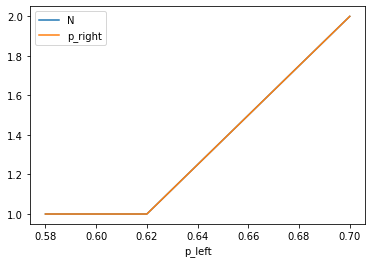

In [345]:
df_collect[df_collect['N'] == 50].groupby('p_left').count().plot()